In [767]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import warnings
warnings.filterwarnings('ignore')

In [768]:
# Set the style of the seaborn plots
sns.set_style("white")

### Question One

1.3 Use at least one year of daily returns to calculate the correlation matrix for the 30 stocks that are constituents of the Dow Jones Index. MATLAB’s “BlueChipStockMoments” can be used to calculate the correlation matrix. Use this correlation matrix for PCA and construct bar graphs to show the weight of each stock for the first and second principal components. Is the
first or second principal component similar to the market (equal weight on each stock)? Discuss why?

In [769]:
dow30 = ['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON',
    'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE',
    'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']

In [770]:
# Download and select the adjusted closing price data for each of the stocks in the dow30
stock_data = yf.download(dow30, period="1y", interval="1d")["Adj Close"]

[*********************100%%**********************]  30 of 30 completed


In [771]:
# Get the returns for the stocks
stock_data = stock_data.pct_change().dropna()
stock_data.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-06,-0.025370,-0.005686,-0.008842,-0.036035,-0.018403,-0.004928,-0.015001,-0.025770,-0.037944,-0.003902,...,-0.009817,-0.020304,-0.015417,0.001274,0.006891,0.008000,-0.021528,-0.004856,-0.015045,-0.011606
2022-12-07,-0.013785,0.008719,0.000452,-0.010817,0.003022,-0.020935,-0.008438,0.002965,-0.001517,-0.006856,...,0.010649,-0.003060,0.003706,0.006431,-0.002387,0.006657,-0.006074,0.007590,0.001478,-0.005204
2022-12-08,0.012133,-0.000665,-0.004200,0.014618,0.008472,-0.002682,0.016812,0.005912,0.004341,-0.002761,...,0.006904,0.012399,0.027970,0.007189,0.003206,0.009228,0.006208,-0.001883,0.006150,0.001548
2022-12-09,-0.003435,-0.024232,-0.001427,0.002569,-0.015720,0.007531,-0.010819,-0.031923,0.008968,-0.007120,...,-0.018674,-0.008003,-0.017421,-0.002643,-0.011027,-0.015915,-0.001913,0.008086,-0.011491,-0.023323
2022-12-12,0.016390,-0.006711,0.022157,0.037485,0.025386,0.015254,0.017334,0.010417,0.013708,0.018128,...,0.001747,0.028889,0.024219,0.010270,0.007864,0.012352,0.028222,0.014706,0.015582,0.018650


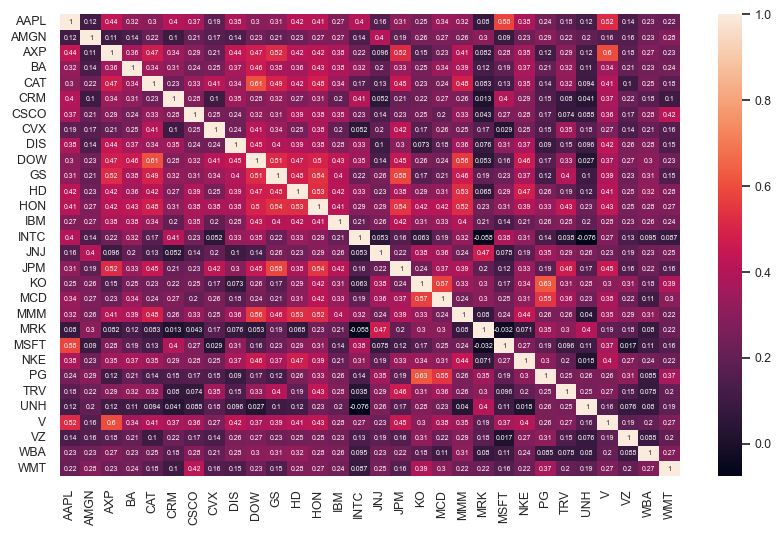

In [772]:
# Get the correlation matrix
price_corr = stock_data.corr()
# Plot the heatmap
sns.set(font_scale=0.8)
plt.figure(figsize=(10,6))
sns.heatmap(price_corr, annot = True, annot_kws={"size": 5})
plt.show()

In [756]:
# Use the scikit learn PCA library to fit the correlation matrix
pca = PCA().fit(stock_data)
# Get the principol components
principal_components = pca.components_
# Get the first and second components
component_one = principal_components[0]
component_two = principal_components[1]

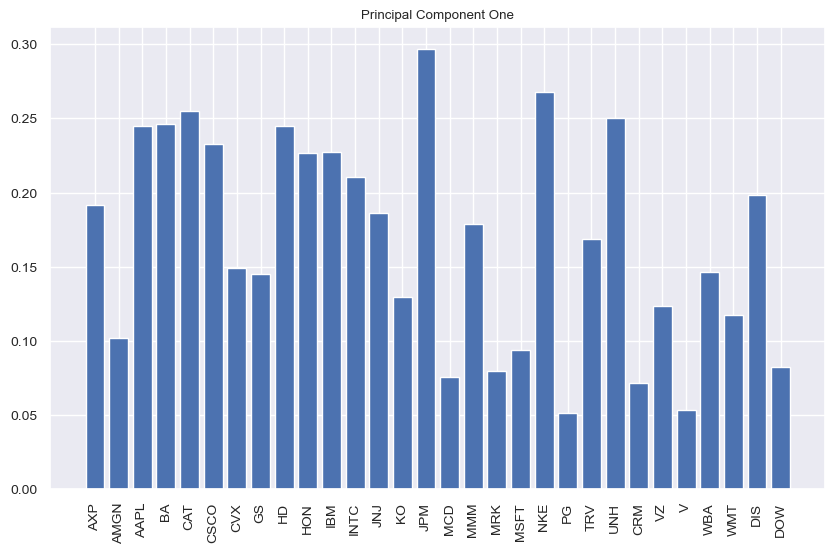

In [757]:
# Plot the first component
plt.figure(figsize = (10,6))
plt.title("Principal Component One")
plt.bar(dow30, component_one, width=0.8)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

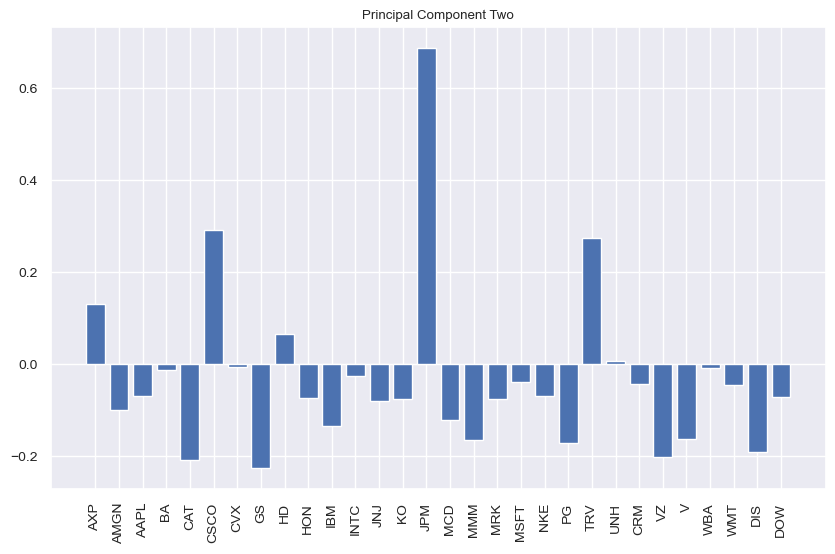

In [758]:
# Plot the second component
plt.figure(figsize = (10,6))
plt.title("Principal Component Two")
plt.bar(dow30, component_two, width=0.8)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

In [759]:
component_one

array([0.19141844, 0.10206176, 0.24459755, 0.24604364, 0.25493262,
       0.23310902, 0.14939251, 0.14532768, 0.2449571 , 0.22647857,
       0.22745521, 0.21051537, 0.18626118, 0.12955174, 0.29661011,
       0.0754259 , 0.17870526, 0.07993441, 0.09367614, 0.26763683,
       0.05117843, 0.16907062, 0.25062231, 0.07179799, 0.12324667,
       0.05354508, 0.14634205, 0.11729993, 0.1984027 , 0.08258037])

In [760]:
component_two

array([ 0.12945797, -0.10077569, -0.07078665, -0.01358948, -0.20946182,
        0.29131346, -0.00743249, -0.22757108,  0.06449055, -0.07397812,
       -0.13436655, -0.02650915, -0.08029425, -0.07747473,  0.6873276 ,
       -0.12150013, -0.16641121, -0.0772848 , -0.03933475, -0.06970214,
       -0.17237144,  0.27399491,  0.00708381, -0.04463591, -0.20331339,
       -0.1639479 , -0.00907549, -0.04639134, -0.19153495, -0.07248181])

1.4 Calculate the amount of variance explained by each principal component and make a ‘Scree’ plot. How many principal components are required to explain 95% of the variance?

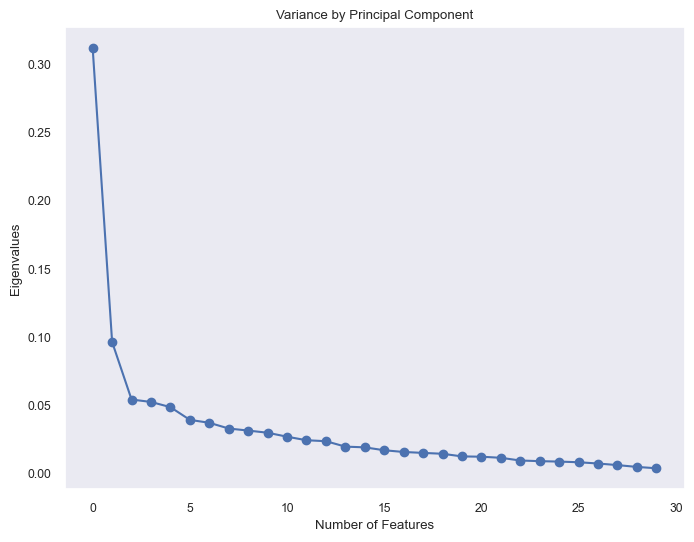

In [761]:
# Get the variance by principal component
variance = pca.explained_variance_ratio_
# Plot the variance by principal component
plt.figure(figsize = (8,6))
plt.title("Variance by Principal Component")
plt.plot(variance, marker="o")
plt.grid()
plt.xlabel("Number of Features")
plt.ylabel("Eigenvalues")
plt.show()

In [762]:
#Get the number of principal components required to explain 95% of the variance
variance_sum = variance.cumsum()
target = 0.95
num_components = 1
for value in variance_sum:
    if value <= target:
        num_components += 1
# Validate the variance at num_components        
print(variance_sum[num_components - 1])

0.9528722435261877


In [763]:
print(f"{num_components} principal components required to explain 95% of the variance")

23 principal components required to explain 95% of the variance


1.5 Investigate the scatter plot of the first two principal components and calculate the average of all 30 stocks. Based on Euclidean distances away from this average, identify the three most distant stocks. Can you explain why these stocks are unusual?

In [764]:
# Get the average by principal component
component_one_mean = component_one.mean()
component_two_mean = component_two.mean()

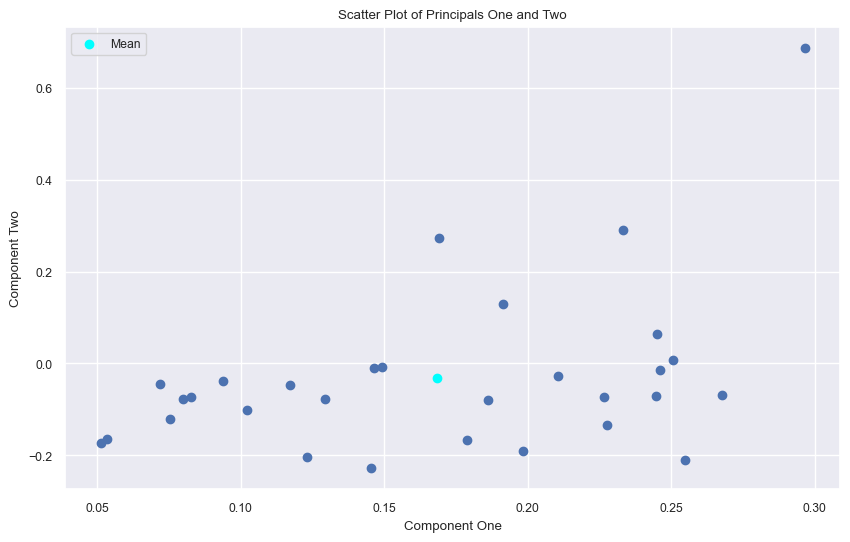

In [765]:
# Plot the scatterplot by principal component
plt.figure(figsize = (10,6))
plt.title("Scatter Plot of Principals One and Two")
plt.scatter(component_one, component_two)
plt.scatter(component_one_mean, component_two_mean, color='cyan', label="Mean")
plt.legend()
plt.xlabel("Component One")
plt.ylabel("Component Two")
plt.show()

In [766]:
# Get the coordinates of each point on the scatterplot and add them to an array
scatterplot_points = np.array([list(point) for point in zip(component_one, component_two)])
# Get the coordinates of the mean point
mean_point = np.array([component_one_mean, component_two_mean])
# Get the distance between the points and the mean point
distances = np.linalg.norm(scatterplot_points - mean_point, axis=1)
# Select the three highest values
top_3_indices = np.argsort(distances)[-3:]
top_3_values = [distances[i] for i in top_3_indices]
# Select the most distant stocks from the dow30 list
stock_one = dow30[top_3_indices[0]]
stock_two = dow30[top_3_indices[1]]
stock_three = dow30[top_3_indices[2]]

print(f"The three most distant stocks are {stock_one}, {stock_two} and {stock_three}")

The three most distant stocks are TRV, CSCO and JPM


### Question Two

2.3. Use the correlation matrix from question (1.3) above to provide pairwise distances between the 30 stocks. Give the formula for this rescaled distance and provide an interpretation of small and large distances.

In [236]:
corr_pairwise_distance = pairwise_distances(np.array(price_corr), metric='correlation')

30

2.4. Construct a horizontal dendrogram using the average linkage approach, carefully labelling the graphic with the names of the 30 stocks.

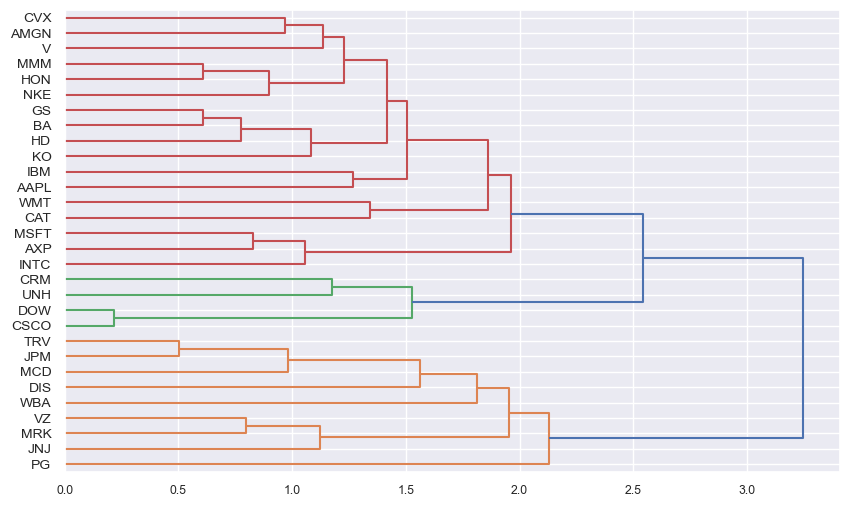

In [773]:
linkage = sch.linkage(corr_pairwise_distance, method="average")
plt.figure(figsize = (10,6))
corr_dendrogram = sch.dendrogram(linkage, orientation='right', labels=dow30)

2.5. Use the dendrogram to provide a few clusters of stocks and list the stocks that are members of each cluster. Can you provide a description of each cluster and relate it to industrial sectors such as Financials, Energy etc?

In [780]:
#Create the clusters from the dendrogram
clusters = sch.fcluster(linkage, t=3, criterion='maxclust')
# Create a dataframe of the components, clusters and stocks
plot_df = pd.DataFrame(zip(component_one, component_two, clusters, dow30))
plot_df = plot_df.rename(columns={0: 'One', 1: 'Two', 2: 'Cluster', 3: "Stock"})

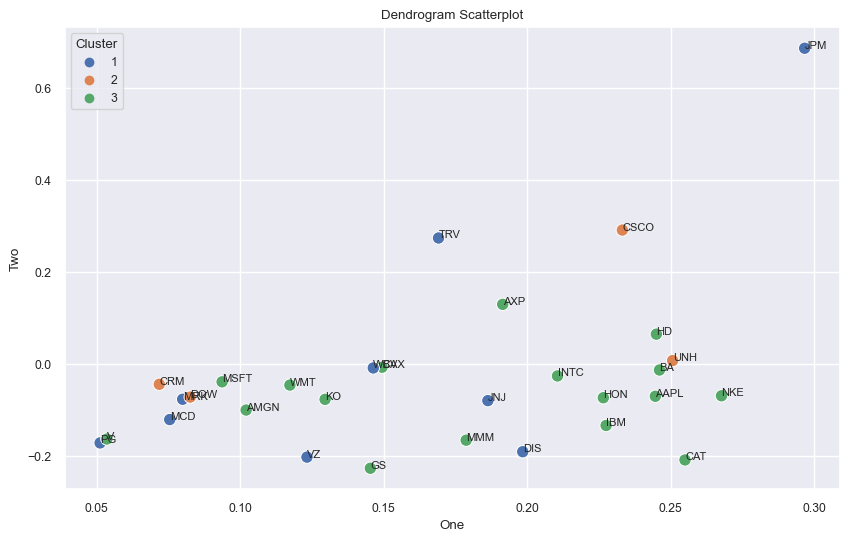

In [782]:
# Plot the scatterplot using the dendrogram
plt.figure(figsize = (10,6))
plt.title("Dendrogram Scatterplot")
sns.scatterplot(data = plot_df, x="One", y="Two", hue="Cluster", palette="deep", s=80)
# Using a for-loop, annotate the scatterplot
for index,row in plot_df.iterrows():
    plt.text(row['One'],row['Two'],row['Stock'],fontsize=8)
plt.show()

In [783]:
# Group the stocks in plot_df by cluster
plot_df

,One,Two,Cluster,Stock
0,0.191418,0.129458,3,AXP
1,0.102062,-0.100776,3,AMGN
2,0.244598,-0.070787,3,AAPL
3,0.246044,-0.013589,3,BA
4,0.254933,-0.209462,3,CAT
5,0.233109,0.291313,2,CSCO
6,0.149393,-0.007432,3,CVX
7,0.145328,-0.227571,3,GS
8,0.244957,0.064491,3,HD
9,0.226479,-0.073978,3,HON


### Question Three

3.4 Construct a random forest (RF) model and apply this to the Titanic dataset. Explain how
you selected the optimal number of trees and support your choice using a graph

In [557]:
# Load the dataset
titanic_data = pd.read_csv('titanic3.csv')[["age", "sex", "pclass", "survived"]]
# Encode the 'sex' data
label_encoder = LabelEncoder()
titanic_data['sex enc'] = label_encoder.fit_transform(titanic_data['sex'])
# Handle NaNs
titanic_data["age"] = titanic_data["age"].fillna(titanic_data["age"].mean())

In [558]:
# Prepare the x and Y data
titanic_X = titanic_data.drop(['survived', 'sex'], axis = 1)
titanic_y = titanic_data[["survived"]]

In [559]:
# Create the classifier
rfClassifier = RandomForestClassifier()

parameters = {'n_estimators':range(1,30)}

# Create the grid search
gridSearch = GridSearchCV(rfClassifier, parameters)
gridSearch.fit(titanic_X, titanic_y.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(1, 30)})

In [563]:
# Get the best scores
n_estimators = gridSearch.best_params_['n_estimators']
print(f"The optimal number of estimators is {n_estimators}")

The optimal number of estimators is 23


In [564]:
# Fit the random forest classifier
rfClassifierOptimal = RandomForestClassifier(n_estimators)
rfClassifierOptimal.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=23)

In [568]:
# Select the mean test scores
mean_scores = gridSearch.cv_results_['mean_test_score']

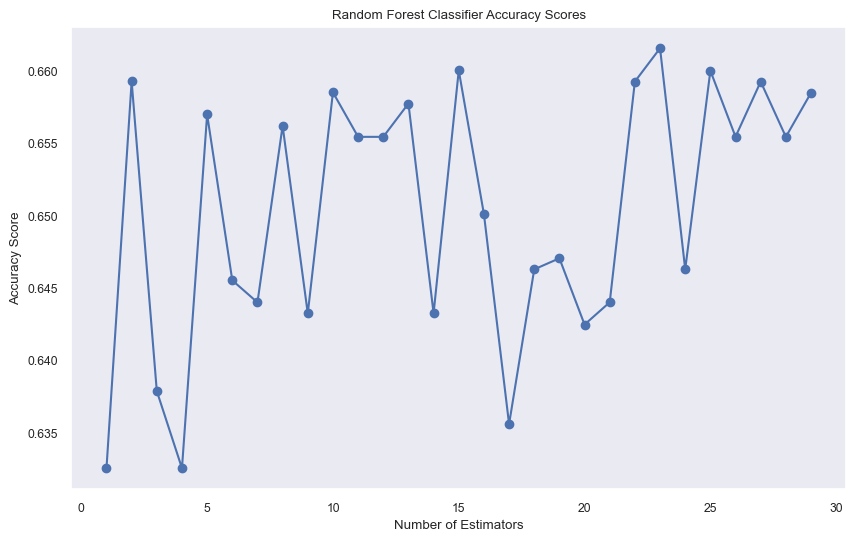

In [747]:
# Plot the mean test scores
plt.figure(figsize = (10,6))
plt.title("Random Forest Classifier Accuracy Scores")
plt.plot(np.arange(len(mean_scores))+1, mean_scores, marker="o")
plt.grid()
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Score")
plt.show()

In [723]:
# Test the model and get the precision
y_pred = rfClassifierOptimal.predict(X_test)

In [724]:
# Get the precision score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {accuracy}")

Accuracy Score : 0.7760814249363868


3.5 Undertake a ROC analysis and show how the RF performs relative to the previous models (logistic regression, classification tree and KNN). Provide evidence to show as clearly as possible which model is best for classifying survival on the Titanic.

In [575]:
# Create the logistic regression classifier
logit = LogisticRegression()
logitScores = cross_val_score(logit, titanic_X, titanic_y.values.ravel(), cv = 10, scoring="accuracy")

In [599]:
# Create the classification tree classifier using Assignment 6 max_depth as 2
clfTree = DecisionTreeClassifier(max_depth = 2)
clfTreeScores = cross_val_score(clfTree, titanic_X, titanic_y.values.ravel(), cv = 10, scoring="accuracy")

In [600]:
# Create the KNN classifier using Assignment 6 number of neigbours as 4
knn = KNeighborsClassifier(n_neighbors = 4)
knnScores = cross_val_score(knn, titanic_X, titanic_y.values.ravel(), cv = 10, scoring="accuracy")

In [603]:
# Get the ROCs and AUCs for the models
y_score_rf = rfClassifierOptimal.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_score_rf)
auc_rf = auc(fpr_rf, tpr_rf)

logit.fit(X_train, y_train.values.ravel())
y_score_logit = logit.predict_proba(X_test)[:,1]
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, y_score_logit)
auc_logit = auc(fpr_logit, tpr_logit)

clfTree.fit(X_train, y_train.values.ravel())
y_score_clf = clfTree.predict_proba(X_test)[:,1]
fpr_clf, tpr_clf, thresholds_clf = roc_curve(y_test, y_score_clf)
auc_clf = auc(fpr_clf, tpr_clf)

knn.fit(X_train, y_train.values.ravel())
y_score_knn = knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_score_knn)
auc_knn = auc(fpr_knn, tpr_knn)

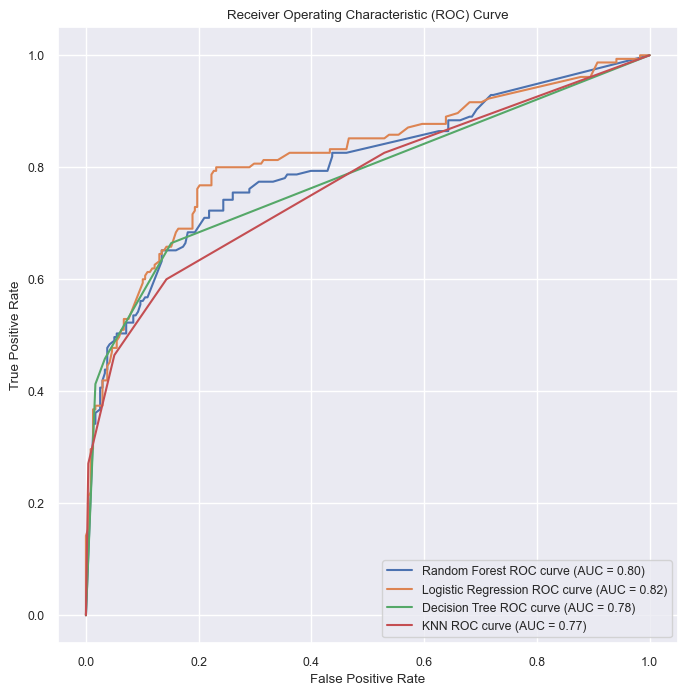

In [748]:
# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC curve (AUC = {auc_rf:.2f})')
plt.plot(fpr_logit, tpr_logit, label=f'Logistic Regression ROC curve (AUC = {auc_logit:.2f})')
plt.plot(fpr_clf, tpr_clf, label=f'Decision Tree ROC curve (AUC = {auc_clf:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN ROC curve (AUC = {auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Question Four

4.2 Construct a random forest (RF) model for the red wine dataset and show how the optimal
number of leafs was estimated.

In [730]:
redwine_df = pd.read_csv('winequality-red.csv', delimiter=";")
#Split the data into X and y using the optimal X values from assignment 6
red_X = redwine_df.drop(columns = ["quality"])
red_y = redwine_df[["quality"]]

In [731]:
# Create the classifier
rfClassifierWine = RandomForestClassifier()

parameters_wine = {'max_leaf_nodes':range(5,100, 5)}

# Create the grid search
gridSearch_wine = GridSearchCV(rfClassifierWine, parameters_wine, cv=10, scoring="neg_mean_squared_error")
gridSearch_wine.fit(red_X, red_y.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': range(5, 100, 5)},
             scoring='neg_mean_squared_error')

In [732]:
# Get the mean scores from the grid search
neg_rf_test_scores = gridSearch_wine.cv_results_['mean_test_score']
rf_test_scores = np.abs(neg_rf_test_scores)
rf_test_scores

array([0.54347877, 0.51091588, 0.51783805, 0.52406053, 0.51780267,
       0.51529874, 0.53221305, 0.52906053, 0.51967374, 0.51345912,
       0.50591981, 0.51590409, 0.53346305, 0.50844733, 0.52655267,
       0.51031053, 0.51659591, 0.52781053, 0.52594733])

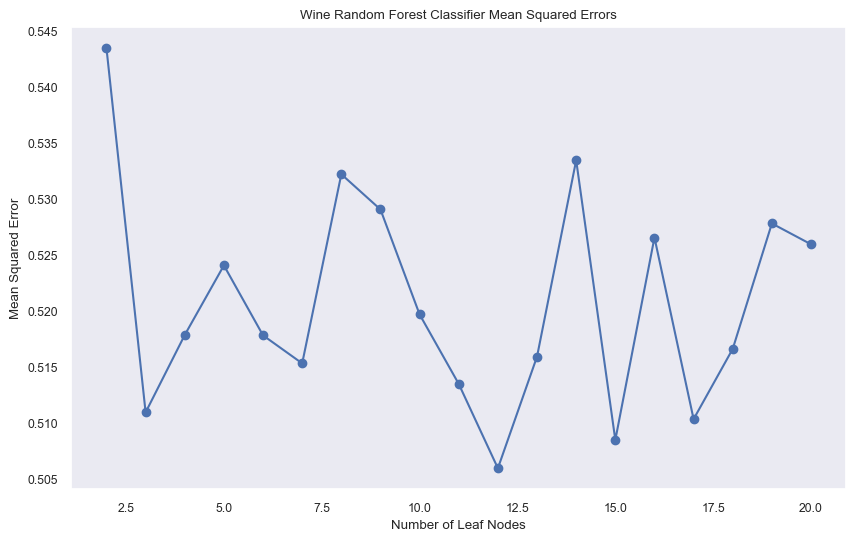

In [733]:
# Plot the mean test scores
plt.figure(figsize = (10,6))
plt.title("Wine Random Forest Classifier Mean Squared Errors")
plt.plot(np.arange(len(rf_test_scores)) + 2, rf_test_scores, marker="o")
plt.grid()
plt.xlabel("Number of Leaf Nodes")
plt.ylabel("Mean Squared Error")
plt.show()

In [734]:
# Get the best scores
n_leaves = gridSearch_wine.best_params_['max_leaf_nodes']
print(f"The optimal number of leaves is {n_leaves}")

The optimal number of leaves is 55


4.3 Explain and show how the optimal number of trees was computed.

In [735]:
wine_parameters = {'n_estimators':range(1,40)}
rfClassifierOptimalLeaves = RandomForestClassifier(max_leaf_nodes=n_leaves)
# Create the grid search
gridSearchWineOptimal = GridSearchCV(rfClassifierOptimalLeaves, wine_parameters, scoring="neg_mean_squared_error")
gridSearchWineOptimal.fit(red_X, red_y.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(max_leaf_nodes=55),
             param_grid={'n_estimators': range(1, 40)},
             scoring='neg_mean_squared_error')

In [736]:
# Get the mean scores from the grid search
neg_rf_test_scores_leaves = gridSearchWineOptimal.cv_results_['mean_test_score']
rf_test_scores_leaves = np.abs(neg_rf_test_scores_leaves)

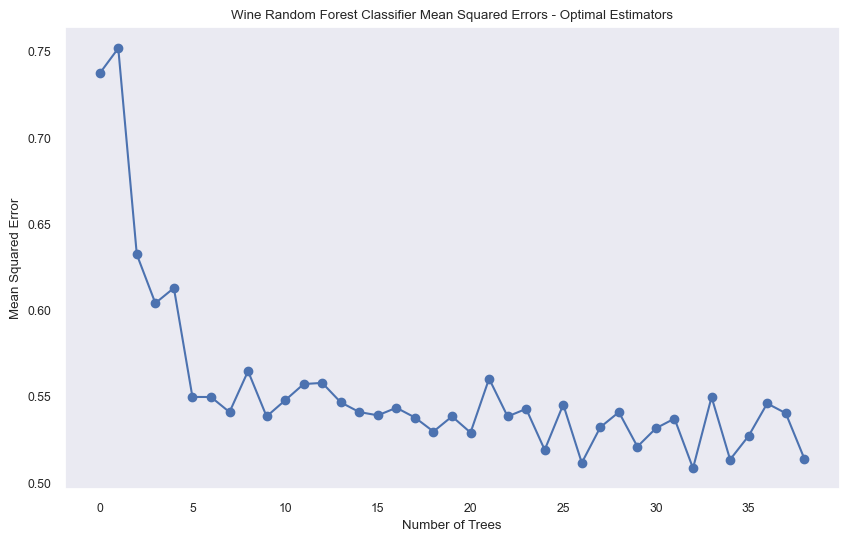

In [737]:
# Plot the mean test scores
plt.figure(figsize = (10,6))
plt.title("Wine Random Forest Classifier Mean Squared Errors - Optimal Estimators")
plt.plot(np.arange(len(rf_test_scores_leaves)), rf_test_scores_leaves, marker="o")
plt.grid()
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error")
plt.show()

In [738]:
# Get the optimal number of trees from the grid search
num_estimators_wine = gridSearchWineOptimal.best_estimator_.n_estimators
print(f"The optimal number of trees is {num_estimators_wine}")

The optimal number of trees is 33


4.4 Provide a bar graph showing the importance of each feature and compare this with the results from Assignment 6 (using correlation and LASSO).

In [739]:
rfClassifierOptimalWine = RandomForestClassifier(n_estimators=num_estimators_wine, max_leaf_nodes=n_leaves)
rfClassifierOptimalWine.fit(red_X, red_y.values.ravel())

RandomForestClassifier(max_leaf_nodes=55, n_estimators=33)

In [740]:
wine_feature_importance = rfClassifierOptimalWine.feature_importances_
wine_feature_importance

array([0.06516381, 0.09389234, 0.05468661, 0.05617031, 0.06492661,
       0.054592  , 0.11787707, 0.0989394 , 0.04371044, 0.1451322 ,
       0.20490922])

In [741]:
wine_features = rfClassifierOptimalWine.feature_names_in_
wine_features

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

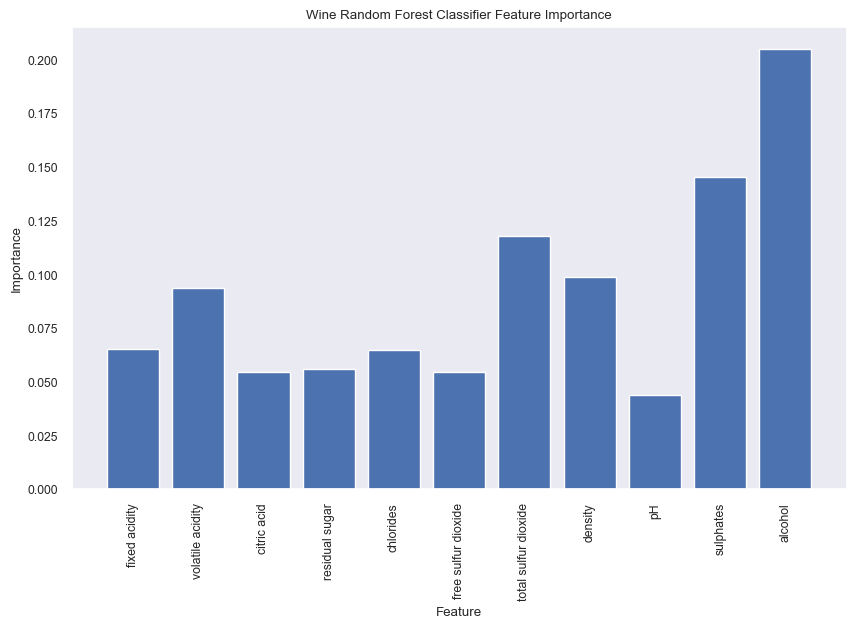

In [742]:
# Plot the mean test scores
plt.figure(figsize = (10,6))
plt.title("Wine Random Forest Classifier Feature Importance")
plt.bar(wine_features, wine_feature_importance)
plt.grid()
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

4.5 What is the performance of the RF model and compare it with the linear regression and KNN models constructed during Assignment 6. Present sufficient information to support your conclusion about the best model for the red wine dataset.

In [743]:
# Get the cross validation scores
rf_wine_scores = cross_val_score(rfClassifierOptimalWine, red_X, red_y.values.ravel(), cv=10, scoring="accuracy")

In [746]:
print(f"Accuracy of the random forest model is {rf_wine_scores.mean()}")

Accuracy of the random forest model is 0.5684905660377358
